# Convolutional Neural Network
- MNIST data
- Convolution Layer
- Pooling Layer

## 1. Settings
### 1) Import required libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

%matplotlib inline

## 2. Data

### 1) Download Data

In [2]:
mnist_train = dset.MNIST('./', train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



### 2) Item : 데이터셋 확인

In [3]:
print(mnist_train)

# dataset.__getitem__(index)
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

# dataset[index]
image, label = mnist_train[0]
print(image.size(), label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5


### 3) Length

In [4]:
# dataset.__len__()
print(mnist_train.__len__())

# len(dataset)
len(mnist_train)

60000


60000

### 4) Show Image

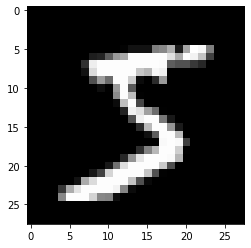

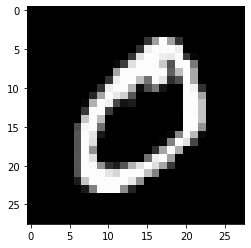

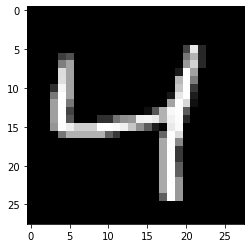

In [5]:
for i in range(3):
    img = mnist_train[i][0].numpy()
    plt.imshow(img[0], cmap='gray')
    plt.show()

## 3. Convolution Layer

- torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
- Channels
- Kernel size
- Stride
- Padding
- [Batch,Channel,Height,Width]


### 1) Channels

torch.Size([1, 3, 26, 26])


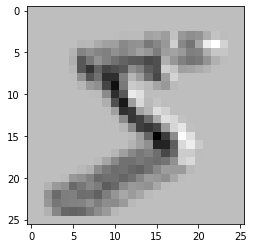

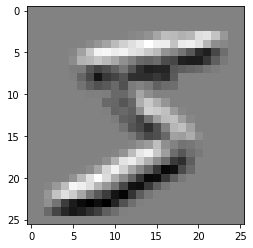

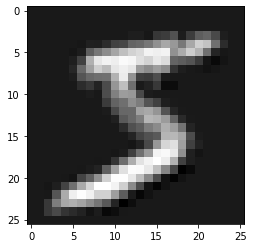

In [6]:
image, label = mnist_train[0]
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
# pytorch 에서 텐서의 뷰(view)는 넘파이의 reshape() 과 같은 역할을 함
# 3차원을 4차원으로 바꿈
# -1 : 파이토치에게 맡긴다는 의미임

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
output = conv_layer(Variable(image))
print(output.size())

# 0번째 이미지(숫자 5)의 결과 채널 3개 출력
for i in range(3):
    plt.imshow(output[0, i, :, :].data.numpy(), cmap='gray')
    plt.show()

### 2) Kernel(Filter) Size

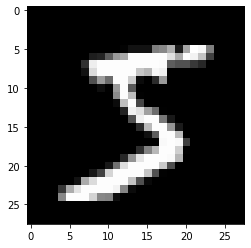

torch.Size([1, 3, 28, 28])


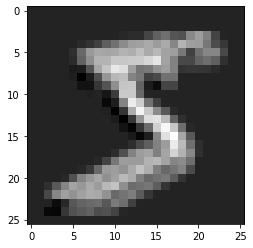

torch.Size([1, 3, 26, 26])


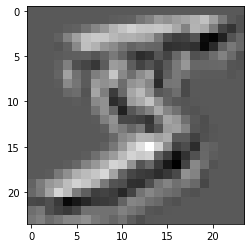

torch.Size([1, 3, 24, 24])


In [7]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1)
output = conv_layer(Variable(image))
plt.imshow(output[0, 0, :, :].data.numpy(), cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
output = conv_layer(Variable(image))
plt.imshow(output[0, 0, :, :].data.numpy(), cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

### 3) Stride

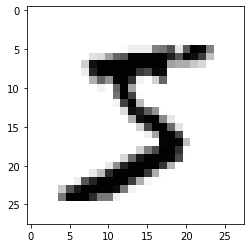

torch.Size([1, 3, 28, 28])


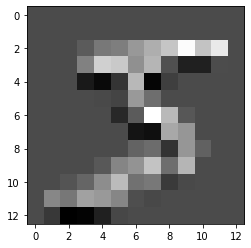

torch.Size([1, 3, 13, 13])


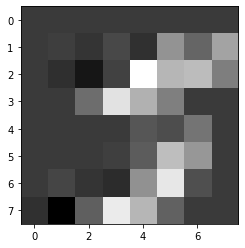

torch.Size([1, 3, 8, 8])


In [8]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1, stride=1)
output = conv_layer(Variable(image))
plt.imshow(output[0, 0, :, :].data.numpy(), cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=2)
output = conv_layer(Variable(image))
plt.imshow(output[0, 0, :, :].data.numpy(), cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5, stride=3)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

### 4) Padding

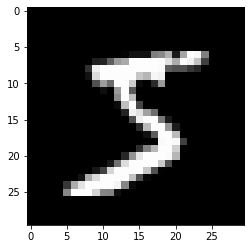

torch.Size([1, 3, 30, 30])


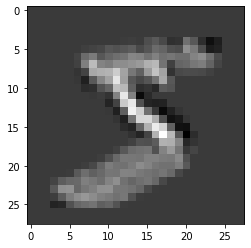

torch.Size([1, 3, 28, 28])


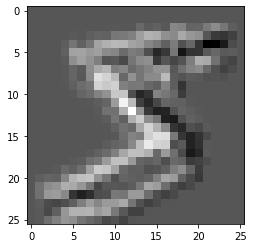

torch.Size([1, 3, 26, 26])


In [9]:
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=1, padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0, 0, :, :].data.numpy(), cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0, 0, :, :].data.numpy(), cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5, padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())